In [2]:
import anndata
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ALLCools.clustering import *
from ALLCools.integration.seurat_class import SeuratIntegration
from ALLCools.plot import *
from wmb import aibs, brain, cemba

In [3]:
ref_adata = anndata.read_h5ad("rna_pca.h5ad")
query_adata = anndata.read_h5ad("mc_pca.h5ad")

In [6]:
# Parameters
categorical_key = ["annotation"]
cpu = 3
mem_gb = 1

In [7]:
adata_list = [ref_adata, query_adata]

In [11]:
n_pc = adata_list[0].obsm["X_pca"].shape[1]
if n_pc < 10:
    n_cca_components = n_pc
else:
    n_cca_components = max(n_pc - 10, 10)

n_cca_components

28

In [12]:
min_sample = adata_merge.obs["Modality"].value_counts().min()
min_sample

4579

In [13]:
integrator = SeuratIntegration()

In [ ]:
anchor = integrator.find_anchor(
    adata_list,
    k_local=None,
    key_local="X_pca",
    key_anchor="X",
    dim_red="cca",
    max_cc_cells=100000,
    n_components=n_cca_components,
    alignments=[[[0], [1]]],
)

In [ ]:
adata_merge.obsm["X_pca_integrate"] = np.concatenate(corrected)

## embedding

## reload adata_merge

In [6]:
adata_merge = anndata.read_h5ad("final_with_coords.h5ad")


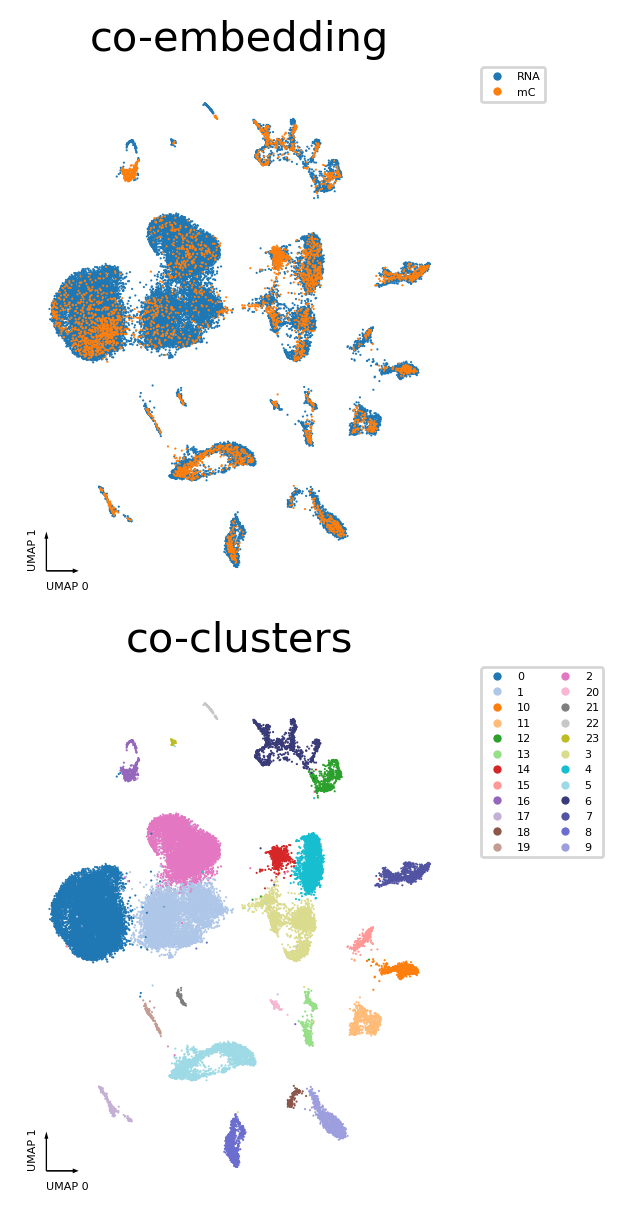

In [18]:
for coord_base in ['umap']:

    fig, axes = plt.subplots(nrows=2,
                             ncols=1,
                             figsize=(3, 6),
                             dpi=200,
                             constrained_layout=True)

    ax = axes[0]
    
    categorical_scatter(
        data=adata_merge,
        ax=ax,
        coord_base=coord_base,
        hue='Modality',
        show_legend=True,
        palette=embed_10_hex_colors,
        max_points=None,
    )

    ax = axes[1]

    categorical_scatter(
        data=adata_merge,
        ax=ax,
        coord_base=coord_base,
        hue='leiden',
        palette=selected_25_hex_colors,
        show_legend=True,
    )
    for i, xx in enumerate([
            'co-embedding', 'co-clusters',
    ]):
        axes.flatten()[i].set_title(xx, fontsize=15)

